<a href="https://colab.research.google.com/github/Kashew765/DigitalMarketing_MLproject/blob/main/facebook_dataanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

In [3]:
df = pd.read_csv("Facebook_Marketplace_data.csv")
# Convert status_published to datetime format
df["status_published"] = pd.to_datetime(df["status_published"], errors='coerce')


 1. How does the time of upload affect num_reaction?

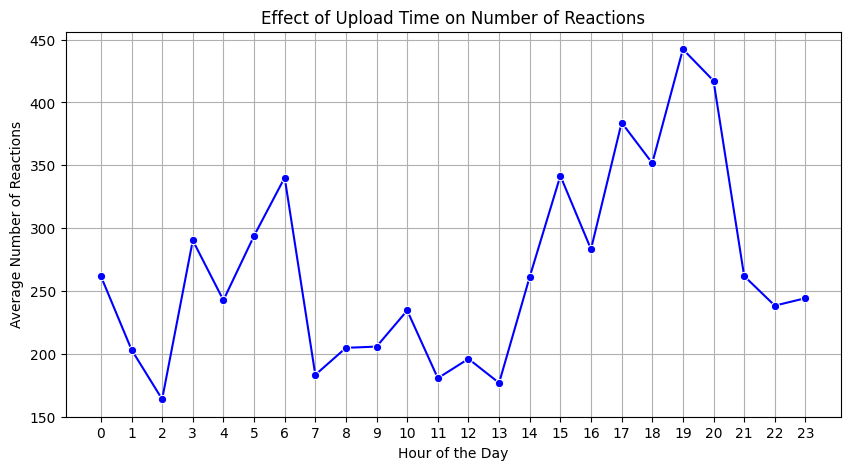

In [14]:
df["hour"] = df["status_published"].dt.hour
hourly_reactions = df.groupby("hour")["num_reactions"].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_reactions.index, y=hourly_reactions.values, marker="o", linestyle="-", color="b")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Number of Reactions")
plt.title("Effect of Upload Time on Number of Reactions")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

2. Correlation between num_reactions, num_comments, num_shares

In [6]:
correlation_matrix = df[["num_reactions", "num_comments", "num_shares"]].corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                num_reactions  num_comments  num_shares
num_reactions       1.000000      0.150843    0.250723
num_comments        0.150843      1.000000    0.640637
num_shares          0.250723      0.640637    1.000000


3. K-Means Clustering

In [7]:
features = ["num_reactions", "num_comments", "num_shares", "num_likes", "num_loves",
            "num_wows", "num_hahas", "num_sads", "num_angrys"]

df_cluster = df[features]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

4. Using the elbow method to find the optimal number of clusters

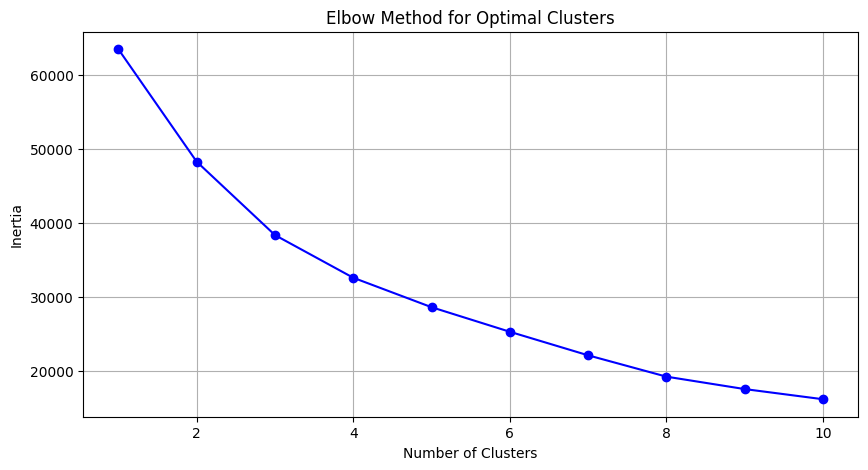

In [11]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bo-', markersize=6)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.grid(True)
plt.show()
# Choosing k=3 (assumption) and training K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(df_scaled)


5. Count of different types of posts

In [13]:
post_type_counts = df["status_type"].value_counts()
print("Count of Post Types:\n", post_type_counts)

Count of Post Types:
 status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64



6. Average values of num_reactions, num_comments, num_shares per post type

In [12]:
post_type_avg = df.groupby("status_type")[["num_reactions", "num_comments", "num_shares"]].mean()
print("Average Values by Post Type:\n", post_type_avg)

Average Values by Post Type:
              num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949
